In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
import pickle

In [5]:
car = pd.read_csv("Cleaned Car.csv")
car = car.drop(columns='Unnamed: 0', errors='ignore')

In [8]:
median_car = car['Price'].median()
car["is_high_value"] = (car["Price"] > median_car).astype(int)

In [9]:
X = car.drop(columns=['Price', 'is_high_value'])
y = car['is_high_value']


In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)


In [11]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['name', 'company', 'fuel_type']])


OneHotEncoder(handle_unknown='ignore')

In [12]:
column_trans = make_column_transformer(
    (OneHotEncoder(categories=ohe.categories_), ['name', 'company', 'fuel_type']),
    remainder='passthrough'
)


In [13]:
log_reg = LogisticRegression(max_iter = 1000)


In [14]:
pipe = make_pipeline(column_trans,log_reg)


In [15]:
pipe.fit(X_train,y_train)

C:\Users\pc\PycharmProjects\FastAPIProject1\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pc\PycharmProjects\FastAPIProject1\venv\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column name

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [16]:
y_pred = pipe.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(pipe, f)

Accuracy: 0.8282208588957055
Confusion Matrix:
 [[63 14]
 [14 72]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        77
           1       0.84      0.84      0.84        86

    accuracy                           0.83       163
   macro avg       0.83      0.83      0.83       163
weighted avg       0.83      0.83      0.83       163



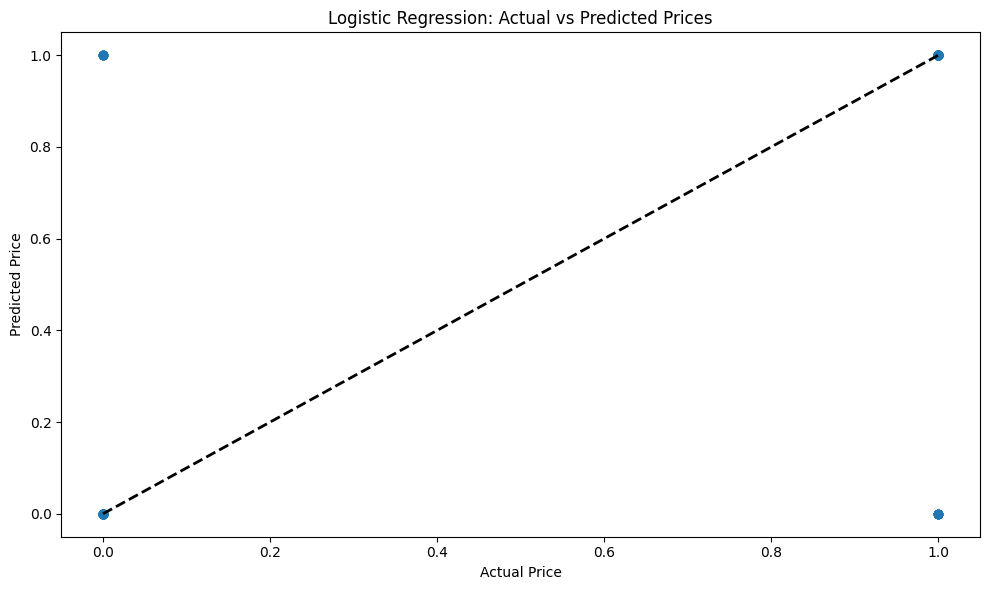

In [17]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Logistic Regression: Actual vs Predicted Prices')
plt.tight_layout()
plt.show()
